## Needed imports

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import copy
from matplotlib.ticker import FormatStrFormatter
starttime = time.time()

## Static parameters

In [159]:
lst_eps = [50,16,8,5,4,3,2,1,0.5]
path_results = 'Results/Accuracy/' 
dataset='Real'
dataset1 = 'adult_10000' 
dataset2 = 'compas_good_outcome'
dataset3 = 'german_good_outcome'
dataset4 = 'db_LSAC'


# Collecting the results for the no privacy setting (baseline)

In [160]:
setting = 'NoLDP'
noldp_dataset1 = pd.read_csv(path_results + dataset1 + '_' + setting + '_results.csv') #adult
noldp_dataset2 = pd.read_csv(path_results + dataset2 + '_' + setting + '_results.csv') #compas
noldp_dataset3 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results.csv') # german_credit_history
noldp_dataset4 = pd.read_csv(path_results + dataset4 + '_' + setting + '_results.csv') # lsac
noldp_dataset5 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results_median.csv') # german_credit_amount
noldp_dataset6 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results_mean.csv') # german_credit_amount_mean
noldp_dataset7 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results_q2.csv') # german_credit_amount_Q2

In [161]:
noldp_dataset3

,Seed_num,SP_maj,SP_min,SPD,EO_maj,EO_min,EOD,CSP_X0_maj,CSP_X0_min,CSD_X0,CSP_X1_maj,CSP_X1_min,CSD_X1,Accuracy
0,0,0.815068,0.703704,0.111365,0.897196,0.848485,0.048711,0.861538,0.928571,-0.067033,0.777778,0.625000,0.152778,0.755
1,1,0.848921,0.819672,0.029249,0.951456,0.945946,0.005510,0.865385,0.888889,-0.023504,0.839080,0.790698,0.048383,0.790
2,2,0.770833,0.803571,-0.032738,0.846154,0.916667,-0.070513,0.913793,0.857143,0.056650,0.674419,0.785714,-0.111296,0.730
3,3,0.863309,0.770492,0.092818,0.940000,0.850000,0.090000,0.945455,0.956522,-0.011067,0.809524,0.657895,0.151629,0.745
4,4,0.882353,0.750000,0.132353,0.950495,0.923077,0.027418,0.958333,0.960000,-0.001667,0.840909,0.615385,0.225524,0.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.818841,0.806452,0.012389,0.890000,0.950000,-0.060000,0.964912,0.947368,0.017544,0.716049,0.744186,-0.028137,0.755
96,96,0.869565,0.790323,0.079243,0.920000,0.900000,0.020000,0.929825,0.888889,0.040936,0.827160,0.750000,0.077160,0.735
97,97,0.781955,0.791045,-0.009090,0.872340,0.934783,-0.062442,0.810345,0.958333,-0.147989,0.760000,0.697674,0.062326,0.765
98,98,0.860140,0.771930,0.088210,0.900000,0.875000,0.025000,0.898305,0.916667,-0.018362,0.833333,0.666667,0.166667,0.715


In [162]:
# computing the mean of each fairness metric
# adult
SP_maj_mean1 = noldp_dataset1.loc[:, 'SP_maj'].mean()
SP_min_mean1 = noldp_dataset1.loc[:, 'SP_min'].mean()
SD_mean1 = noldp_dataset1.loc[:, 'SPD'].mean()
EO_maj_mean1 = noldp_dataset1.loc[:, 'EO_maj'].mean()
EO_min_mean1 = noldp_dataset1.loc[:, 'EO_min'].mean()
EOD_mean1 = noldp_dataset1.loc[:, 'EOD'].mean()
CSP_X0_maj_mean1 = noldp_dataset1.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean1 = noldp_dataset1.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean1 = noldp_dataset1.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean1 = noldp_dataset1.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean1 = noldp_dataset1.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean1 = noldp_dataset1.loc[:, 'CSD_X1'].mean()
acc_mean1 = noldp_dataset1.loc[:, 'Accuracy'].mean()
# compas
SP_maj_mean2 = noldp_dataset2.loc[:, 'SP_maj'].mean()
SP_min_mean2 = noldp_dataset2.loc[:, 'SP_min'].mean()
SD_mean2 = noldp_dataset2.loc[:, 'SPD'].mean()
EO_maj_mean2 = noldp_dataset2.loc[:, 'EO_maj'].mean()
EO_min_mean2 = noldp_dataset2.loc[:, 'EO_min'].mean()
EOD_mean2 = noldp_dataset2.loc[:, 'EOD'].mean()
CSP_X0_maj_mean2 = noldp_dataset2.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean2 = noldp_dataset2.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean2 = noldp_dataset2.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean2 = noldp_dataset2.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean2 = noldp_dataset2.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean2 = noldp_dataset2.loc[:, 'CSD_X1'].mean()
acc_mean2 = noldp_dataset2.loc[:, 'Accuracy'].mean()
# german_credit_history
SP_maj_mean3 = noldp_dataset3.loc[:, 'SP_maj'].mean()
SP_min_mean3 = noldp_dataset3.loc[:, 'SP_min'].mean()
SD_mean3 = noldp_dataset3.loc[:, 'SPD'].mean()
EO_maj_mean3 = noldp_dataset3.loc[:, 'EO_maj'].mean()
EO_min_mean3 = noldp_dataset3.loc[:, 'EO_min'].mean()
EOD_mean3 = noldp_dataset3.loc[:, 'EOD'].mean()
CSP_X0_maj_mean3 = noldp_dataset3.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean3 = noldp_dataset3.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean3 = noldp_dataset3.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean3 = noldp_dataset3.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean3 = noldp_dataset3.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean3 = noldp_dataset3.loc[:, 'CSD_X1'].mean()
acc_mean3 = noldp_dataset3.loc[:, 'Accuracy'].mean()
# lsac
SP_maj_mean4 = noldp_dataset4.loc[:, 'SP_maj'].mean()
SP_min_mean4 = noldp_dataset4.loc[:, 'SP_min'].mean()
SD_mean4 = noldp_dataset4.loc[:, 'SPD'].mean()
EO_maj_mean4 = noldp_dataset4.loc[:, 'EO_maj'].mean()
EO_min_mean4 = noldp_dataset4.loc[:, 'EO_min'].mean()
EOD_mean4 = noldp_dataset4.loc[:, 'EOD'].mean()
CSP_X0_maj_mean4 = noldp_dataset4.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean4 = noldp_dataset4.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean4 = noldp_dataset4.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean4 = noldp_dataset4.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean4 = noldp_dataset4.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean4 = noldp_dataset4.loc[:, 'CSD_X1'].mean()
acc_mean4 = noldp_dataset4.loc[:, 'Accuracy'].mean()
# german_credit_amount_median
SP_maj_mean5 = noldp_dataset5.loc[:, 'SP_maj'].mean()
SP_min_mean5 = noldp_dataset5.loc[:, 'SP_min'].mean()
SD_mean5 = noldp_dataset5.loc[:, 'SPD'].mean()
EO_maj_mean5 = noldp_dataset5.loc[:, 'EO_maj'].mean()
EO_min_mean5 = noldp_dataset5.loc[:, 'EO_min'].mean()
EOD_mean5 = noldp_dataset5.loc[:, 'EOD'].mean()
CSP_X0_maj_mean5 = noldp_dataset5.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean5 = noldp_dataset5.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean5 = noldp_dataset5.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean5 = noldp_dataset5.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean5 = noldp_dataset5.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean5 = noldp_dataset5.loc[:, 'CSD_X1'].mean()
acc_mean5 = noldp_dataset5.loc[:, 'Accuracy'].mean()
# german_credit_amount_mean
SP_maj_mean6 = noldp_dataset6.loc[:, 'SP_maj'].mean()
SP_min_mean6 = noldp_dataset6.loc[:, 'SP_min'].mean()
SD_mean6 = noldp_dataset6.loc[:, 'SPD'].mean()
EO_maj_mean6 = noldp_dataset6.loc[:, 'EO_maj'].mean()
EO_min_mean6 = noldp_dataset6.loc[:, 'EO_min'].mean()
EOD_mean6 = noldp_dataset6.loc[:, 'EOD'].mean()
CSP_X0_maj_mean6 = noldp_dataset6.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean6 = noldp_dataset6.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean6 = noldp_dataset6.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean6 = noldp_dataset6.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean6 = noldp_dataset6.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean6 = noldp_dataset6.loc[:, 'CSD_X1'].mean()
acc_mean6 = noldp_dataset6.loc[:, 'Accuracy'].mean()
# german_credit_amount_Q2
SP_maj_mean7 = noldp_dataset7.loc[:, 'SP_maj'].mean()
SP_min_mean7 = noldp_dataset7.loc[:, 'SP_min'].mean()
SD_mean7 = noldp_dataset7.loc[:, 'SPD'].mean()
EO_maj_mean7 = noldp_dataset7.loc[:, 'EO_maj'].mean()
EO_min_mean7 = noldp_dataset7.loc[:, 'EO_min'].mean()
EOD_mean7 = noldp_dataset7.loc[:, 'EOD'].mean()
CSP_X0_maj_mean7 = noldp_dataset7.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean7 = noldp_dataset7.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean7 = noldp_dataset7.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean7 = noldp_dataset7.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean7 = noldp_dataset7.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean7 = noldp_dataset7.loc[:, 'CSD_X1'].mean()
acc_mean7 = noldp_dataset7.loc[:, 'Accuracy'].mean()

# Collecting the results of the LDP setting 

In [163]:
setting = 'sLDP'
sldp_dataset1 = pd.read_csv(path_results + dataset1 + '_' + setting + '_results.csv') #adult
sldp_dataset2 = pd.read_csv(path_results + dataset2 + '_' + setting + '_results.csv') #compas
sldp_dataset3 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results.csv') #german_credit
sldp_dataset4 = pd.read_csv(path_results + dataset4 + '_' + setting + '_results.csv') #lsac
sldp_dataset5 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results2.csv')#german_credit_amount_median
sldp_dataset6 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results_mean.csv')#german_credit_amount_mean
sldp_dataset7 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results_q2.csv')#german_credit_amount_meam

In [164]:
sldp_dataset4

,Seed_num,epsilon,SP_maj,SP_min,SPD,EO_maj,EO_min,EOD,CSP_X0_maj,CSP_X0_min,CSD_X0,CSP_X1_maj,CSP_X1_min,CSD_X1,Accuracy
0,0,50.0,0.996366,0.850427,0.145938,0.997838,0.870787,0.127051,0.993439,0.830508,0.162931,0.999011,0.912281,0.086731,0.945913
1,1,50.0,0.997672,0.904545,0.093127,0.998922,0.922156,0.076766,0.995778,0.890173,0.105605,0.999493,0.957447,0.042046,0.948116
2,2,50.0,0.996348,0.885375,0.110972,0.997827,0.913265,0.084562,0.994652,0.870813,0.123839,0.997962,0.954545,0.043417,0.947381
3,3,50.0,0.993486,0.838710,0.154777,0.994847,0.869110,0.125737,0.988643,0.838542,0.150101,0.997989,0.839286,0.158703,0.943465
4,4,50.0,0.993486,0.846774,0.146712,0.994843,0.860825,0.134018,0.990068,0.818681,0.171387,0.996883,0.924242,0.072641,0.941997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,95,0.5,0.990104,0.922764,0.067340,0.992406,0.942408,0.049997,0.985515,0.913978,0.071536,0.994756,0.950000,0.044756,0.943955
896,96,0.5,0.993245,0.902954,0.090291,0.994589,0.917582,0.077006,0.988002,0.880435,0.107567,0.998447,0.981132,0.017315,0.943955
897,97,0.5,0.995320,0.883333,0.111986,0.996487,0.926554,0.069934,0.992593,0.882979,0.109614,0.997955,0.884615,0.113340,0.947626
898,98,0.5,0.993517,0.882609,0.110908,0.993784,0.904494,0.089289,0.990796,0.869565,0.121231,0.996018,0.934783,0.061235,0.942242


In [165]:
# sldp_dataset1 = sldp_dataset1.drop(sldp_dataset1[sldp_dataset1['epsilon'] == 50].index)
# sldp_dataset2 = sldp_dataset2.drop(sldp_dataset2[sldp_dataset2['epsilon'] == 50].index)
# sldp_dataset3 = sldp_dataset3.drop(sldp_dataset3[sldp_dataset3['epsilon'] == 50].index)
# sldp_dataset4 = sldp_dataset4.drop(sldp_dataset4[sldp_dataset4['epsilon'] == 50].index)
# sldp_dataset5 = sldp_dataset5.drop(sldp_dataset5[sldp_dataset5['epsilon'] == 50].index)

In [166]:
#splitting the csv file using epsilon as splitting condition
df_by_eps_dataset1 = [y for x, y in sldp_dataset1.groupby('epsilon')]
df_by_eps_dataset2 = [y for x, y in sldp_dataset2.groupby('epsilon')]
df_by_eps_dataset3 = [y for x, y in sldp_dataset3.groupby('epsilon')]
df_by_eps_dataset4 = [y for x, y in sldp_dataset4.groupby('epsilon')]
df_by_eps_dataset5 = [y for x, y in sldp_dataset5.groupby('epsilon')]
df_by_eps_dataset6 = [y for x, y in sldp_dataset6.groupby('epsilon')]
df_by_eps_dataset7 = [y for x, y in sldp_dataset7.groupby('epsilon')]

In [167]:
df_by_eps_dataset1[::-1]

[    Seed_num  epsilon    SP_maj    SP_min       SPD    EO_maj    EO_min  \
 0          0     50.0  0.963533  0.915667  0.047867  0.985203  0.967376   
 1          1     50.0  0.966077  0.918305  0.047772  0.987535  0.967773   
 2          2     50.0  0.962387  0.917055  0.045331  0.987841  0.964896   
 3          3     50.0  0.961928  0.918846  0.043082  0.988246  0.962273   
 4          4     50.0  0.965640  0.922922  0.042718  0.989923  0.968019   
 ..       ...      ...       ...       ...       ...       ...       ...   
 95        95     50.0  0.964637  0.908969  0.055669  0.987911  0.961483   
 96        96     50.0  0.956584  0.937842  0.018743  0.984953  0.977306   
 97        97     50.0  0.960594  0.913029  0.047565  0.987981  0.961015   
 98        98     50.0  0.960955  0.906460  0.054495  0.987156  0.958213   
 99        99     50.0  0.961919  0.921641  0.040278  0.987103  0.964354   
 
          EOD  CSP_X0_maj  CSP_X0_min    CSD_X0  CSP_X1_maj  CSP_X1_min  \
 0   0.0178

In [168]:
# dataset1
#creating lists for each fairness metric -- values are stored starting from epsilon = 50
sldp_sp_maj1, sldp_sp_min1, sldp_spd1 = [], [], []
sldp_eo_maj1, sldp_eo_min1, sldp_eod1 = [], [], []
sldp_csp_b0_maj1, sldp_csp_b0_min1, sldp_csd_b01 = [], [], []
sldp_csp_b1_maj1, sldp_csp_b1_min1, sldp_csd_b11,acc1 = [], [], [],[]
for df in df_by_eps_dataset1[::-1]:
    sldp_sp_maj1.append(np.mean(df['SP_maj']))
    sldp_sp_min1.append(np.mean(df['SP_min']))
    sldp_spd1.append(np.mean(df['SPD']))
    sldp_eo_maj1.append(np.mean(df['EO_maj']))
    sldp_eo_min1.append(np.mean(df['EO_min']))
    sldp_eod1.append(np.mean(df['EOD']))
    sldp_csp_b0_maj1.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min1.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b01.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj1.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min1.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b11.append(np.mean(df['CSD_X1']))
    acc1.append(np.mean(df['Accuracy']))

In [169]:
# dataset2
#creating lists for each fairness metric -- values are stored starting from epsilon = 50
sldp_sp_maj2, sldp_sp_min2, sldp_spd2 = [], [], []
sldp_eo_maj2, sldp_eo_min2, sldp_eod2 = [], [], []
sldp_csp_b0_maj2, sldp_csp_b0_min2, sldp_csd_b02 = [], [], []
sldp_csp_b1_maj2, sldp_csp_b1_min2, sldp_csd_b12, acc2 = [], [], [], []

for df in df_by_eps_dataset2[::-1]:
    sldp_sp_maj2.append(np.mean(df['SP_maj']))
    sldp_sp_min2.append(np.mean(df['SP_min']))
    sldp_spd2.append(np.mean(df['SPD']))
    sldp_eo_maj2.append(np.mean(df['EO_maj']))
    sldp_eo_min2.append(np.mean(df['EO_min']))
    sldp_eod2.append(np.mean(df['EOD']))
    sldp_csp_b0_maj2.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min2.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b02.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj2.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min2.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b12.append(np.mean(df['CSD_X1']))
    acc2.append(np.mean(df['Accuracy']))

In [170]:
# dataset3
#creating lists for each fairness metric -- values are stored starting from epsilon = 50
sldp_sp_maj3, sldp_sp_min3, sldp_spd3 = [], [], []
sldp_eo_maj3, sldp_eo_min3, sldp_eod3 = [], [], []
sldp_csp_b0_maj3, sldp_csp_b0_min3, sldp_csd_b03 = [], [], []
sldp_csp_b1_maj3, sldp_csp_b1_min3, sldp_csd_b13, acc3 = [], [], [], []

for df in df_by_eps_dataset3[::-1]:
    sldp_sp_maj3.append(np.mean(df['SP_maj']))
    sldp_sp_min3.append(np.mean(df['SP_min']))
    sldp_spd3.append(np.mean(df['SPD']))
    sldp_eo_maj3.append(np.mean(df['EO_maj']))
    sldp_eo_min3.append(np.mean(df['EO_min']))
    sldp_eod3.append(np.mean(df['EOD']))
    sldp_csp_b0_maj3.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min3.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b03.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj3.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min3.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b13.append(np.mean(df['CSD_X1']))
    acc3.append(np.mean(df['Accuracy']))

In [171]:
# dataset4
#creating lists for each fairness metric -- values are stored starting from epsilon = 50
sldp_sp_maj4, sldp_sp_min4, sldp_spd4 = [], [], []
sldp_eo_maj4, sldp_eo_min4, sldp_eod4 = [], [], []
sldp_csp_b0_maj4, sldp_csp_b0_min4, sldp_csd_b04 = [], [], []
sldp_csp_b1_maj4, sldp_csp_b1_min4, sldp_csd_b14, acc4 = [], [], [], []

for df in df_by_eps_dataset4[::-1]:
    sldp_sp_maj4.append(np.mean(df['SP_maj']))
    sldp_sp_min4.append(np.mean(df['SP_min']))
    sldp_spd4.append(np.mean(df['SPD']))
    sldp_eo_maj4.append(np.mean(df['EO_maj']))
    sldp_eo_min4.append(np.mean(df['EO_min']))
    sldp_eod4.append(np.mean(df['EOD']))
    sldp_csp_b0_maj4.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min4.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b04.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj4.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min4.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b14.append(np.mean(df['CSD_X1']))
    acc4.append(np.mean(df['Accuracy']))
    print(len(sldp_csd_b14))

1
2
3
4
5
6
7
8
9


In [172]:
# dataset5
#creating lists for each fairness metric -- values are stored starting from epsilon = 50
sldp_sp_maj5, sldp_sp_min5, sldp_spd5 = [], [], []
sldp_eo_maj5, sldp_eo_min5, sldp_eod5 = [], [], []
sldp_csp_b0_maj5, sldp_csp_b0_min5, sldp_csd_b05 = [], [], []
sldp_csp_b1_maj5, sldp_csp_b1_min5, sldp_csd_b15, acc5 = [], [], [], []

for df in df_by_eps_dataset5[::-1]:
    sldp_sp_maj5.append(np.mean(df['SP_maj']))
    sldp_sp_min5.append(np.mean(df['SP_min']))
    sldp_spd5.append(np.mean(df['SPD']))
    sldp_eo_maj5.append(np.mean(df['EO_maj']))
    sldp_eo_min5.append(np.mean(df['EO_min']))
    sldp_eod5.append(np.mean(df['EOD']))
    sldp_csp_b0_maj5.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min5.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b05.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj5.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min5.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b15.append(np.mean(df['CSD_X1']))
    acc5.append(np.mean(df['Accuracy']))
    print(np.std(df['CSD_X1']))

0.08283580991954294
0.09235669382016563
0.0854498251355667
0.08533394676186147
0.08384577622716294
0.08368793431740157
0.08599295773718682
0.09343657007602214
0.07491768814149627


In [173]:
# dataset6
#creating lists for each fairness metric -- values are stored starting from epsilon = 50
sldp_sp_maj6, sldp_sp_min6, sldp_spd6 = [], [], []
sldp_eo_maj6, sldp_eo_min6, sldp_eod6 = [], [], []
sldp_csp_b0_maj6, sldp_csp_b0_min6, sldp_csd_b06 = [], [], []
sldp_csp_b1_maj6, sldp_csp_b1_min6, sldp_csd_b16, acc6 = [], [], [], []

for df in df_by_eps_dataset6[::-1]:
    sldp_sp_maj6.append(np.mean(df['SP_maj']))
    sldp_sp_min6.append(np.mean(df['SP_min']))
    sldp_spd6.append(np.mean(df['SPD']))
    sldp_eo_maj6.append(np.mean(df['EO_maj']))
    sldp_eo_min6.append(np.mean(df['EO_min']))
    sldp_eod6.append(np.mean(df['EOD']))
    sldp_csp_b0_maj6.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min6.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b06.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj6.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min6.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b16.append(np.mean(df['CSD_X1']))
    acc6.append(np.mean(df['Accuracy']))

In [174]:
# dataset7
#creating lists for each fairness metric -- values are stored starting from epsilon = 50
sldp_sp_maj7, sldp_sp_min7, sldp_spd7 = [], [], []
sldp_eo_maj7, sldp_eo_min7, sldp_eod7 = [], [], []
sldp_csp_b0_maj7, sldp_csp_b0_min7, sldp_csd_b07 = [], [], []
sldp_csp_b1_maj7, sldp_csp_b1_min7, sldp_csd_b17, acc7 = [], [], [], []

for df in df_by_eps_dataset7[::-1]:
    sldp_sp_maj7.append(np.mean(df['SP_maj']))
    sldp_sp_min7.append(np.mean(df['SP_min']))
    sldp_spd7.append(np.mean(df['SPD']))
    sldp_eo_maj7.append(np.mean(df['EO_maj']))
    sldp_eo_min7.append(np.mean(df['EO_min']))
    sldp_eod7.append(np.mean(df['EOD']))
    sldp_csp_b0_maj7.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min7.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b07.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj7.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min7.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b17.append(np.mean(df['CSD_X1']))
    acc7.append(np.mean(df['Accuracy']))

## Displaying the results of fairness_privacy_Tradeoff for Adult, Compas, German_credit_history, LSAC

In [175]:
x = range(len(lst_eps))
l = ['$\infty$','16','8','5','4','3','2','1','0.5']

In [176]:
def Make_subplots_2(lst_eps,dataset_name):    
    fig2, ax2 = plt.subplots(2, 2, figsize=(10, 6),sharex=False, sharey=False)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    #plt.yticks(fontsize=9)
    #Compas
#     ax2[0,0].axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
    ax2[0,0].plot(sldp_spd2,color='forestgreen',label='SD',marker='o',markersize=3)
    ax2[0,0].plot(sldp_eod2,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
    ax2[0,0].plot(sldp_csd_b02,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
    ax2[0,0].plot(sldp_csd_b12,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
    #Adult
#     ax2[0,1].axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
    ax2[0,1].plot(sldp_spd1,color='forestgreen',label='SD',marker='o',markersize=3)
    ax2[0,1].plot(sldp_eod1,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
    ax2[0,1].plot(sldp_csd_b01,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
    ax2[0,1].plot(sldp_csd_b11,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
    #German credit
#     ax2[1,0].axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
    ax2[1,0].plot(sldp_spd3,color='forestgreen',label='SD',marker='o',markersize=3)
    ax2[1,0].plot(sldp_eod3,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
    ax2[1,0].plot(sldp_csd_b03,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
    ax2[1,0].plot(sldp_csd_b13,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
    #LSAC
#     ax2[1,1].axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
    ax2[1,1].plot(sldp_spd4,color='forestgreen',label='SD',marker='o',markersize=3)
    ax2[1,1].plot(sldp_eod4,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
    ax2[1,1].plot(sldp_csd_b04,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
    ax2[1,1].plot(sldp_csd_b14,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
    

    ax2[0,0].set_title('(a) Compas',fontsize=12)
    ax2[0,1].set_title('(b) Adult', fontsize=12)
    ax2[1,0].set_title('(c) German credit', fontsize=12)
    ax2[1,1].set_title('(d) LSAC', fontsize=12)

    for i in range(2):
        for j in range(2):
            ax2[i,j].set_xticks(range(len(lst_eps)), labels = l,fontsize=9)        
            ax2[i,j].get_xticklabels()[0].set_fontsize(16)
            ax2[i,j].set_xlabel('$\epsilon$', fontsize=12)   
            ax2[i,j].grid(axis='y')
            #ax2[i,j].legend(fontsize='8')
    ax2[0,0].legend(loc = 'upper right',bbox_to_anchor = (1.7,1.45) ,ncol=5,fontsize='11')
    # saving the plot as a pdf file
    fig2.savefig(path_results + dataset + '_Difference_all_datasets_GS.pdf',dpi=100,bbox_inches='tight')
    
    return fig2.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


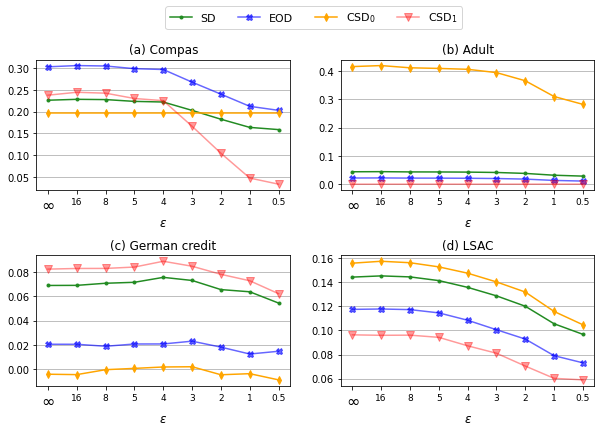

In [177]:
Make_subplots_2(lst_eps,'Real')

## Displaying the results of fairness_privacy_Tradeoff for German_credit_amount (median as threshold)

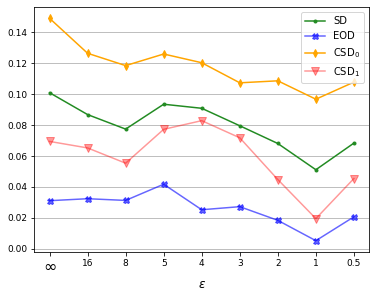

In [178]:
# specifying the plot size
plt.figure(figsize = (6, 4.5))
# plt.axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
plt.plot(sldp_spd5,color='forestgreen',label='SD',marker='o',markersize=3)
plt.plot(sldp_eod5,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
plt.plot(sldp_csd_b05,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
plt.plot(sldp_csd_b15,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
plt.xticks(range(len(lst_eps)),l,fontsize=9)
ax = plt.gca()
ax.get_xticklabels()[0].set_fontsize(16)
plt.yticks(fontsize=9)
plt.xlabel('$\epsilon$', fontsize=12) 
plt.grid(axis='y')
plt.legend()

plt.savefig(path_results + dataset + "_German_credit_amount.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Displaying the results of fairness_privacy_Tradeoff for German_credit_amount (mean as threshold)

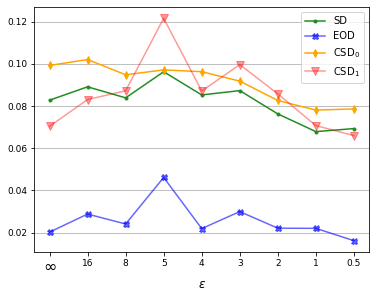

In [179]:
# specifying the plot size
plt.figure(figsize = (6, 4.5))
# plt.axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
plt.plot(sldp_spd6,color='forestgreen',label='SD',marker='o',markersize=3)
plt.plot(sldp_eod6,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
plt.plot(sldp_csd_b06,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
plt.plot(sldp_csd_b16,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
plt.xticks(range(len(lst_eps)),l,fontsize=9)
ax = plt.gca()
ax.get_xticklabels()[0].set_fontsize(16)
plt.yticks(fontsize=9)
plt.xlabel('$\epsilon$', fontsize=12) 
plt.grid(axis='y')
plt.legend()

plt.savefig(path_results + dataset + "_German_credit_amount_mean.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Displaying the results of fairness_privacy_Tradeoff for German_credit_amount (Q2 as threshold)

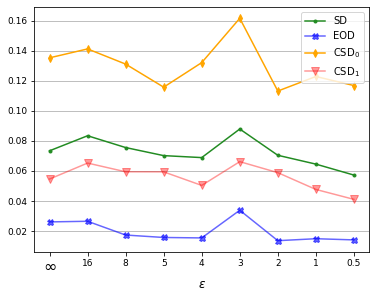

In [180]:
# specifying the plot size
plt.figure(figsize = (6, 4.5))
# plt.axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
plt.plot(sldp_spd7,color='forestgreen',label='SD',marker='o',markersize=3)
plt.plot(sldp_eod7,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
plt.plot(sldp_csd_b07,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
plt.plot(sldp_csd_b17,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
plt.xticks(range(len(lst_eps)),l,fontsize=9)
ax = plt.gca()
ax.get_xticklabels()[0].set_fontsize(16)
plt.yticks(fontsize=9)
plt.xlabel('$\epsilon$', fontsize=12) 
plt.grid(axis='y')
plt.legend()

plt.savefig(path_results + dataset + "_German_credit_amount_q2.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Results for the Impact of the LDP on Fairness when considering groups individually

In [188]:
def Make_subplots3(lst_eps,dataset_name):    
    fig2, ax2 = plt.subplots(2, 2, figsize=(10, 6),sharex=False, sharey=False)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    #plt.yticks(fontsize=5)
    
    #Compas
    ax2[0,0].plot(sldp_sp_maj2, label = r'$P[\hat{Y}=1|A=1]$', color='forestgreen',linestyle='solid', marker='o',alpha=0.5,markersize=8)
    ax2[0,0].plot(sldp_sp_min2, label = r'$P[\hat{Y}=1|A=0]$', color='magenta',linestyle='dashed', marker='X',markersize=8)
    ax2[0,0].plot(sldp_eo_maj2,  label = r'$P[\hat{Y}=1|Y=1,A=1]$',color='blue', linestyle='solid', marker='d',alpha=0.5,markersize=4)
    ax2[0,0].plot(sldp_eo_min2,  label = r'$P[\hat{Y}=1|Y=1,A=0]$',color='orange',linestyle='dashed', marker='.')
    #ax2[0,0].legend(bbox_to_anchor = (4.25,0.9) ,ncol=1,fontsize='8') 

    # Adult:

    ax2[0,1].plot(sldp_sp_maj1,label = r'$P[\hat{Y}=1|A=1]$', color='forestgreen',linestyle='solid', marker='o',alpha=0.5,markersize=8)
    ax2[0,1].plot(sldp_sp_min1,label = r'$P[\hat{Y}=1|A=0]$', color='magenta',linestyle='dashed', marker='X',markersize=8)
    ax2[0,1].plot(sldp_eo_maj1,  label = r'$P[\hat{Y}=1|Y=1,A=1]$',color='blue', linestyle='solid', marker='d',alpha=0.5,markersize=4)
    ax2[0,1].plot(sldp_eo_min1,  label = r'$P[\hat{Y}=1|Y=1,A=0]$',color='orange',linestyle='dashed', marker='.')
    
    # German credit_history:

    ax2[1,0].plot(sldp_sp_maj3,label = r'$P[\hat{Y}=1|A=1]$', color='forestgreen',linestyle='solid', marker='o',alpha=0.5,markersize=8)
    ax2[1,0].plot(sldp_sp_min3,label = r'$P[\hat{Y}=1|A=0]$', color='magenta',linestyle='dashed', marker='X',markersize=8)
    ax2[1,0].plot(sldp_eo_maj3,  label = r'$P[\hat{Y}=1|Y=1,A=1]$',color='blue', linestyle='solid', marker='d',alpha=0.5,markersize=4)
    ax2[1,0].plot(sldp_eo_min3,  label = r'$P[\hat{Y}=1|Y=1,A=0]$',color='orange',linestyle='dashed', marker='.')

    # LSAC:

    ax2[1,1].plot(sldp_sp_maj4,label = r'$P[\hat{Y}=1|A=1]$', color='forestgreen',linestyle='solid', marker='o',alpha=0.5,markersize=8)
    ax2[1,1].plot(sldp_sp_min4,label = r'$P[\hat{Y}=1|A=0]$', color='magenta',linestyle='dashed', marker='X',markersize=8)
    ax2[1,1].plot(sldp_eo_maj4,  label = r'$P[\hat{Y}=1|Y=1,A=1]$',color='blue', linestyle='solid',marker='d',alpha=0.5,markersize=4)
    ax2[1,1].plot(sldp_eo_min4,  label = r'$P[\hat{Y}=1|Y=1,A=0]$',color='orange',linestyle='dashed', marker='.')

    
    #     # S4:
#     ax2[2].plot(sldp_sp_maj1, label = r'$P[\hat{Y}=1|A=1]$', color='forestgreen',linestyle='solid', marker='o',alpha=0.5)
#     ax2[2].plot(sldp_sp_min1,  label = r'$P[\hat{Y}=1|A=0]$', color='magenta',linestyle='dashed', marker='X',markersize=8)
#     ax2[2].plot(sldp_eo_maj1,  label = r'$P[\hat{Y}=1|Y=1,A=1]$',color='blue', linestyle='solid', marker='d',alpha=0.5)
#     ax2[2].plot(sldp_eo_min1, label = r'$P[\hat{Y}=1|Y=1,A=0]$',color='orange',linestyle='dashed', marker='.')
    

        
    ax2[0,0].set_title('(a) Compas',fontsize=12)
    ax2[0,1].set_title('(b) Adult',fontsize=12)
    ax2[1,0].set_title('(c) German credit',fontsize=12)
    ax2[1,1].set_title('(d) LSAC',fontsize=12)


    for i in range(2):
        for j in range(2):
#             ax2[i,j].set_xticks(range(len(lst_eps)))  
            ax2[i,j].set_xticks(range(len(lst_eps)), labels = l,fontsize=9) 
            ax2[i,j].get_xticklabels()[0].set_fontsize(16)
#             ax2[i,j].set_xticklabels(lst_eps,fontsize=10)
            ax2[i,j].set_xlabel('$\epsilon$', fontsize=12)
            ax2[i,j].grid(axis='y')
            ax2[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax2[0,0].legend(loc = 'upper right',bbox_to_anchor = (2.2,1.4) ,ncol=4,fontsize='11')        
    # saving the plot as a pdf file
    fig2.savefig(path_results + dataset + '_separate_all_datasets_GS.pdf',dpi=100,bbox_inches='tight')
    
    return fig2.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


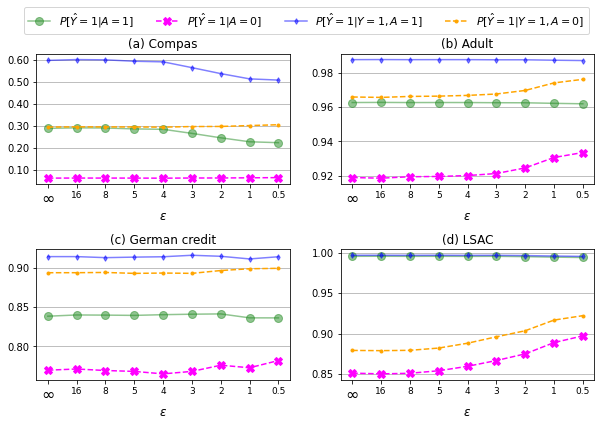

In [189]:
#lst_eps = [16,8,5,4,3,2.9,2.8,2.7,2.6,2.5,2.4,2.3,2.2,2.1,2,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
Make_subplots3(lst_eps,'Real')

## Computing the accuracy for all the datasets

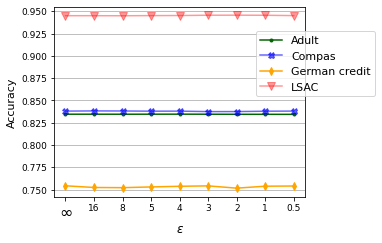

In [196]:
plt.figure(figsize = (4.5, 3.5))
plt.plot(acc1,color='darkgreen',label='Adult',marker='o',markersize=3)
plt.plot(acc2,color='blue',label='Compas',marker='X',markersize=6, alpha=0.6)
plt.plot(acc3,color='orange',label='German credit',marker='d',markersize=5)
plt.plot(acc4,color='red', label='LSAC',marker='v',markersize=8, alpha=0.4)
# plt.plot(acc5,color='black',label='S5',marker='d',markersize=13)
# plt.plot(acc6,color='magenta', label='S6',marker='X',markersize=16, alpha=0.5)
# plt.plot(acc7,color='cyan', label='S7',marker='s',markersize=8,alpha=0.5)
plt.xticks(range(len(lst_eps)),l,fontsize=9)
ax = plt.gca()
ax.get_xticklabels()[0].set_fontsize(16)
plt.yticks(fontsize=9)
plt.xlabel('$\epsilon$', fontsize=12) 
plt.ylabel('Accuracy',fontsize=11)
plt.grid(axis='y')
# plt.legend(loc = 'upper right',bbox_to_anchor = (1,0.9) ,ncol=1,fontsize='10')
plt.legend(loc = 'upper right',bbox_to_anchor = (1.3,0.9) ,ncol=1,fontsize='11')

plt.savefig(path_results + dataset + "_accuracy.pdf", format="pdf", bbox_inches="tight")
plt.show()